# Predicting Bike Rentals

## Introduction

Communal bike sharing serves have been implemented in many American cities. As a such service provider, we would like to know what factors may impact the total bike rentals and predicting how much profit we can make for given circumstances. This project implement ML algorithm to predict total bike rentals and distinct major factors that contribute to the result.

The data set will be using is from [Hadi Fanaee-T](https://folk.uio.no/hadift/) at the [University of Porto](http://www.up.pt/). This data set contains bike rental information at Washington, D.C. The csv file can be downloaded [here](http://archive.ics.uci.edu/ml/datasets/Bike+Sharing+Dataset) from the University of California, Irvine's website.

Here are the descriptions for the relevant columns:

* instant - A unique sequential ID number for each row
* dteday - The date of the rentals
* season - The season in which the rentals occurred
* yr - The year the rentals occurred
* mnth - The month the rentals occurred
* hr - The hour the rentals occurred
* holiday - Whether or not the day was a holiday
* weekday - The day of the week (as a number, 0 to 7)
* workingday - Whether or not the day was a working day
* weathersit - The weather (as a categorical variable)
* temp - The temperature, on a 0-1 scale
* atemp - The adjusted temperature
* hum - The humidity, on a 0-1 scale
* windspeed - The wind speed, on a 0-1 scale
* casual - The number of casual riders (people who hadn't previously signed up * with the bike sharing program)
* registered - The number of registered riders (people who had already signed up)
* cnt - The total number of bike rentals (casual + registered)

## Data 

Load the data set. Here the target is cnt which is the total rental and we want to drop the casual and registered columns due to data leakage. 

In [1]:
import pandas as pd
import numpy as np

bike_rentals = pd.read_csv("hour.csv")
bike_rentals.tail()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
17374,17375,2012-12-31,1,1,12,19,0,1,1,2,0.26,0.2576,0.60,0.1642,11,108,119
17375,17376,2012-12-31,1,1,12,20,0,1,1,2,0.26,0.2576,0.60,0.1642,8,81,89
17376,17377,2012-12-31,1,1,12,21,0,1,1,1,0.26,0.2576,0.60,0.1642,7,83,90
17377,17378,2012-12-31,1,1,12,22,0,1,1,1,0.26,0.2727,0.56,0.1343,13,48,61
17378,17379,2012-12-31,1,1,12,23,0,1,1,1,0.26,0.2727,0.65,0.1343,12,37,49


In [2]:
bike_rentals.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
instant       17379 non-null int64
dteday        17379 non-null object
season        17379 non-null int64
yr            17379 non-null int64
mnth          17379 non-null int64
hr            17379 non-null int64
holiday       17379 non-null int64
weekday       17379 non-null int64
workingday    17379 non-null int64
weathersit    17379 non-null int64
temp          17379 non-null float64
atemp         17379 non-null float64
hum           17379 non-null float64
windspeed     17379 non-null float64
casual        17379 non-null int64
registered    17379 non-null int64
cnt           17379 non-null int64
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


In [3]:
bike_rentals.isna().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
hr            0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

We check the data info see what data type each column is also see if any missing data. This data set is relativly clean and has no missing data present.

## Drop unwanted feature

Since the target "cnt" is the sum of "casual" and "registered" rentals, these feature will directly effecting the prediction result. The detday is the date information which has benn expressed by other features like weekday, hour...etc. 

In [4]:
bike_rentals.drop(['casual','registered','dteday'],axis = 1, inplace= True)

In [5]:
bike_rentals.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 14 columns):
instant       17379 non-null int64
season        17379 non-null int64
yr            17379 non-null int64
mnth          17379 non-null int64
hr            17379 non-null int64
holiday       17379 non-null int64
weekday       17379 non-null int64
workingday    17379 non-null int64
weathersit    17379 non-null int64
temp          17379 non-null float64
atemp         17379 non-null float64
hum           17379 non-null float64
windspeed     17379 non-null float64
cnt           17379 non-null int64
dtypes: float64(4), int64(10)
memory usage: 1.9 MB


## Feature transform

Here the hour that a bike was rented. To give the feature more meaning, I group them into four time zone, morning, afternoon, evening, and night.

In [6]:
def assign_label(hour):
    # Night
    if hour >=0 and hour < 6:
        return 4
    #Morning
    elif hour >=6 and hour < 12:
        return 1
    #Afternoon
    elif hour >= 12 and hour < 18:
        return 2
    #Evening
    elif hour >= 18 and hour <=24:
        return 3

bike_rentals["time_label"] = bike_rentals["hr"].apply(assign_label)

In [7]:
bike_rentals.drop(['hr'],axis = 1, inplace= True)

In [8]:
bike_rentals.head()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt,time_label
0,1,1,0,1,0,6,0,1,0.24,0.2879,0.81,0.0,16,4
1,2,1,0,1,0,6,0,1,0.22,0.2727,0.80,0.0,40,4
2,3,1,0,1,0,6,0,1,0.22,0.2727,0.80,0.0,32,4
3,4,1,0,1,0,6,0,1,0.24,0.2879,0.75,0.0,13,4
4,5,1,0,1,0,6,0,1,0.24,0.2879,0.75,0.0,1,4


## Data Exploration

Here we wnat to have some preliminary data exploration that can help us determine which feature to be included in the training.

The first thing to do is find the correlation between our target and the feature set:

In [9]:
bike_rentals.corr()['cnt'].sort_values()

time_label   -0.378318
hum          -0.322911
weathersit   -0.142426
holiday      -0.030927
weekday       0.026900
workingday    0.030284
windspeed     0.093234
mnth          0.120638
season        0.178056
yr            0.250495
instant       0.278379
atemp         0.400929
temp          0.404772
cnt           1.000000
Name: cnt, dtype: float64

As shown above, not many strong correlation present in the features. However, this is as expected since a lot of features are actually categorical data and contains no ordinal information. We still can see some features show a relative high correlation to the total rental time such as temp and hum.

(array([6972., 3705., 2659., 1660.,  987.,  663.,  369.,  188.,  139.,
          37.]),
 array([  1. ,  98.6, 196.2, 293.8, 391.4, 489. , 586.6, 684.2, 781.8,
        879.4, 977. ]),
 <a list of 10 Patch objects>)

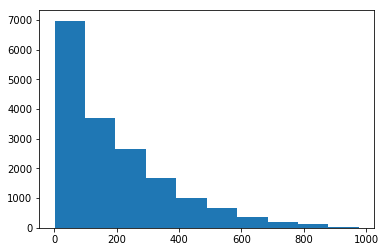

In [10]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.hist(bike_rentals["cnt"])

## Modle selection and comparasion

In [11]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.metrics import mean_squared_error


# define feature space and the training label
X = bike_rentals.drop(['cnt', 'instant'],axis = 1)
y = bike_rentals['cnt']

# split training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

def evalulation(estimator,X,y):
    mse = (-(cross_val_score(estimator,X,y,scoring="neg_mean_squared_error",cv = 10)))
    print('Cross validation:')
    print("MSE :{}, Std: {}".format((mse.mean()), mse.std()))
def print_rmse(prediction,y):
    mse = mean_squared_error(y,prediction)
    print('Test set:')
    print("MSE :{}".format((mse.mean())))

In [12]:
# Linear regrassor
lr = LinearRegression()
lr.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [13]:
prediction = lr.predict(X_test)
evalulation(lr,X_train,y_train)
print_rmse(prediction,y_test)

Cross validation:
MSE :19409.816496396765, Std: 917.2494004879107
Test set:
MSE :19203.45191624832


In [14]:
# Decision Tree Regressor
Tree = DecisionTreeRegressor(random_state = 2)
Tree.fit(X_train,y_train)


DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=2, splitter='best')

In [15]:
prediction = Tree.predict(X_test)
evalulation(Tree,X_train,y_train)
print_rmse(prediction,y_test)

Cross validation:
MSE :23774.70376426928, Std: 1385.3915629863318
Test set:
MSE :22317.722276702694


The mse of linear regressor seems perform better than decision tree regressor at defult setting. This might beacuse we did not limit the min number of samples leaf and the result was effected by the extrem values we observed earlier in the histogram. 

To find a better min_samples_leaf, we'd like to see the value distribution of total rentals:

In [16]:
print(bike_rentals["cnt"].value_counts(bins=10))

(0.023, 98.6]     6972
(98.6, 196.2]     3705
(196.2, 293.8]    2659
(293.8, 391.4]    1660
(391.4, 489.0]     997
(489.0, 586.6]     653
(586.6, 684.2]     369
(684.2, 781.8]     188
(781.8, 879.4]     139
(879.4, 977.0]      37
Name: cnt, dtype: int64


As seen in the distribution above, the heighest value bin has number of 37, The goal is to have these extream values to be split into the same leaf. Thus, we can try the "min_samples_leaf" as 37.

In [17]:
# Decision Tree Regressor
Tree = DecisionTreeRegressor(min_samples_leaf = 37, random_state = 2)
Tree.fit(X_train,y_train)

DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=37,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=2, splitter='best')

In [18]:
prediction = Tree.predict(X_test)
evalulation(Tree,X_train,y_train)
print_rmse(prediction,y_test)

Cross validation:
MSE :14451.860403784294, Std: 582.3001545536317
Test set:
MSE :13365.074082820043


The Decision Tree perform much better when we adjust the hyperparameter "min_sampls_leaf". 

## RandomForest Regressor
In order to get a better prediction, we like to use RandomForest, which is a ensemble of multiple decision trees. Each of the decision tree are different. The difference may derive from sample bagging (or boostrap) and/or use of features. RandomForest provide a average(or vote) decision of mutiple trees which usually give a better prediction.

In [19]:
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor(min_samples_leaf=37, random_state=2,n_estimators=100)
rf.fit(X_train,y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=37, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=None,
           oob_score=False, random_state=2, verbose=0, warm_start=False)

In [20]:
prediction = rf.predict(X_test)
evalulation(rf,X_train,y_train)
print_rmse(prediction,y_test)

Cross validation:
MSE :13482.881799829562, Std: 494.1451477261537
Test set:
MSE :12666.853797386126


In [21]:
pd.Series(rf.feature_importances_,index = X.columns).sort_values(ascending=False)

time_label    0.477535
temp          0.188218
yr            0.127321
hum           0.085051
atemp         0.029649
season        0.028622
workingday    0.024770
mnth          0.016245
windspeed     0.008699
weathersit    0.007990
weekday       0.005900
holiday       0.000000
dtype: float64

RandomForest perform even better than a single decision tree as we can see the result above. 


## More insight into the data set 

The time_label feature contribute the most to decision tree and sould be highly correlated with the rental hours, which make sense since people more tend to ride bikes during daytime and less people would be on streets at night. We can visualize the rantal hours distribution of each time duration:

Text(0.5, 0, '')

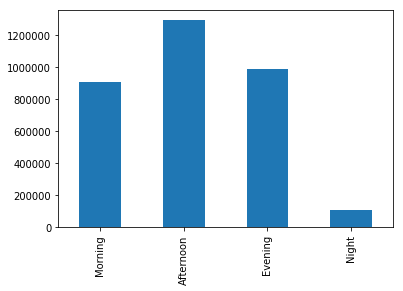

In [22]:
bike_rentals.groupby(by='time_label').sum()['cnt'].plot(kind='bar')
plt.xticks(ticks=[0,1,2,3],labels=['Morning','Afternoon','Evening','Night'])
plt.xlabel('')

As seen in the bar plot above, afternoon has the highest total rentals during the day. Evening and morning have similar total rentals and as expected, night time is the least time people would like to rent a bike. 

Next, we can dig into the rental distribution for each time period:

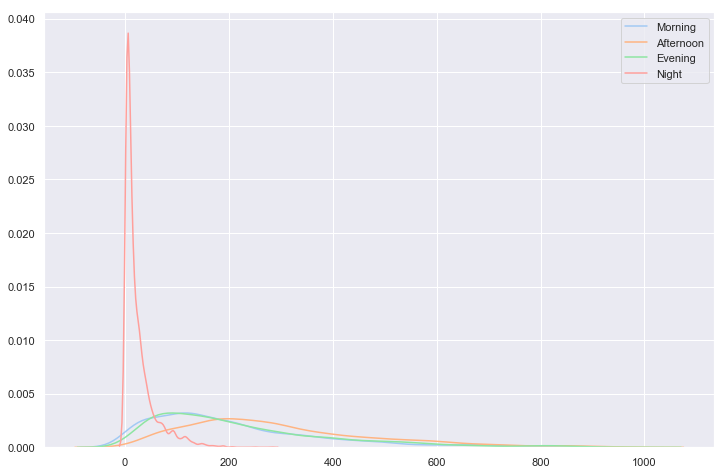

In [23]:
import seaborn as sns
sns.set(style="darkgrid", palette="pastel", color_codes=True)
fig = plt.figure(figsize=(12,8))

sns.kdeplot(bike_rentals[bike_rentals['time_label']==1]['cnt'],label= "Morning")
sns.kdeplot(bike_rentals[bike_rentals['time_label']==2]['cnt'],label= "Afternoon")
sns.kdeplot(bike_rentals[bike_rentals['time_label']==3]['cnt'],label= "Evening")
sns.kdeplot(bike_rentals[bike_rentals['time_label']==4]['cnt'],label= "Night")

The kde plot above shows total rentals in each time label during a day. For morning, afternoon, and evening, the distributions are similar but with differnet peak value, which reflect the observation in the previous barplot. The kde of Night time has a vary high peak at low value. This can be expressed as people less likely to rent a bike for leasure purpose, but just for commute to certain dedtination. Thus, the total rental instances at night twards to a low value.

## Bike rental progress
Since we have data for two years, we can compare the rental distribution between the two years. To get a comprehensive comparesion, I used a violoinplot, which shows distribution of total rentals in each time label for 2011 and 2012.

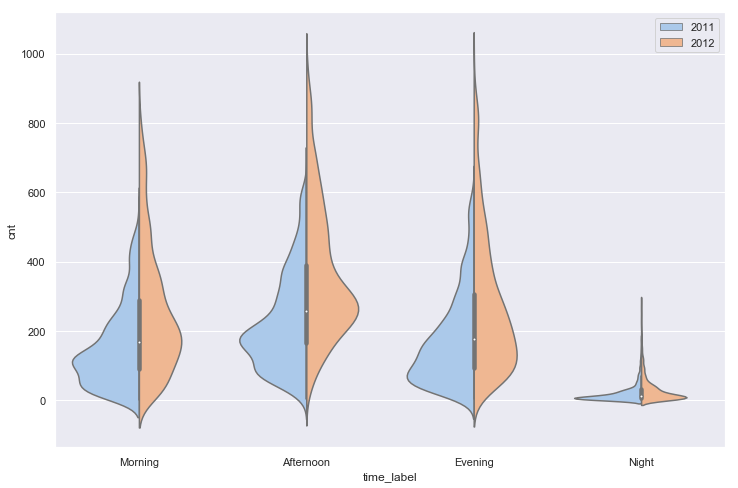

In [24]:
plt.figure(figsize=(12,8))
sns.violinplot(data =bike_rentals, x="time_label", y="cnt",hue='yr',split=True)
plt.xticks(ticks=[0,1,2,3],labels=['Morning','Afternoon','Evening','Night'])
L = plt.legend()
L.get_texts()[0].set_text('2011')
L.get_texts()[1].set_text('2012')

#sns.despine(left=True)

The voilin plot above shows the distribution between the years. The afternoon distribution in 2012 onviously move twards to higher values comparing to 2011. Morning and evening show similar tendency but not as significant as afternoon. The kde of bike rentals at night very similar in year 2011 and 2012.

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


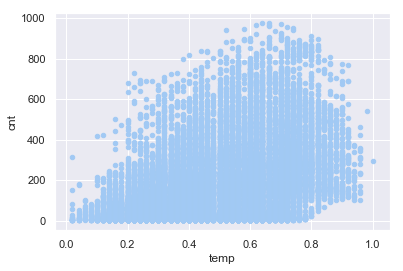

In [25]:
bike_rentals.plot(x='temp',y='cnt',kind='scatter')



# Conclusion

This project shows a end to end analysis on bike rental data set at Washington, D.C.. The project start with data cleaning and data exploration see if any missing data. Hopefully, this data set is very clean and orgnized, little effort was put in this part of the project. After preparing the data set, next step is process and select feature. A simple but effective feature transformation was conducted to enhence the performance.



###  Model Selection:
 Here I used a Linear modle as base model for comparision and select Decision Tree since many features in the data set are categorical features. After the preliminary tryout of each algorithm, Decision Tree did not perform well, but after explore the data set and hyper parameter tuning, the performance was improved and better than the linear model.
To further improve the model, A ensemble method of Decision Tree, Random Forest, was used. Looking at the evaluation metrix on training and test set, not much overfitting was observed and RandomFroest results in the best prediction amount the three models. 

### Further investigation:

According to the importance of each feature, I did more investigation on the data set. Bike rental is highly correlated with time label in a day. If one want to build a sharing bike somewhere, it wil be better to select a place that have more active people during afternoon, and may need some kind of support and location arragement during the peak time (afternoon). The violin plot shows the comparsion between 2011 and 2012. The rentals have grown in 2012 this may due to several factors, for example, may be more and more people knows about the bike sharing service or maybe the company has increase the total number of bike and station for people to use.  

This project gives a initial idea of this what can be used for this kind of data. For new location suggestion, we may need more data from other places since this data set is only a set of sample in Washington. 